In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [16]:
df=pd.read_csv('../data/creditcard.csv')

In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

In [18]:
# Rename mapping
rename_map = {
    "Time": "txn_timestamp_sec",
    "Amount": "ach_amount",
    "Class": "fraud_label",
}

# Add V1..V28 mappings
rename_map.update({f"V{i}": f"embedding_feature_{i}" for i in range(1, 29)})

# Apply rename
df = df.rename(columns=rename_map)

df.head()

,txn_timestamp_sec,embedding_feature_1,embedding_feature_2,embedding_feature_3,embedding_feature_4,embedding_feature_5,embedding_feature_6,embedding_feature_7,embedding_feature_8,embedding_feature_9,...,embedding_feature_21,embedding_feature_22,embedding_feature_23,embedding_feature_24,embedding_feature_25,embedding_feature_26,embedding_feature_27,embedding_feature_28,ach_amount,fraud_label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# 1. Customer ID
df["customer_id"] = df.index % 50000  # 50K customers

# 2. Transaction type
df["txn_type"] = np.where(df["ach_amount"] > 200, "TRANSFER",
                  np.where(df["ach_amount"] > 100, "DEBIT",
                  np.where(df["ach_amount"] < 20, "BILL_PAY", "CREDIT")))

# 3. Channel
df["channel"] = np.random.choice(["WEB", "MOBILE", "API"], size=len(df), p=[0.6, 0.3, 0.1])



In [22]:
df.head()


,txn_timestamp_sec,embedding_feature_1,embedding_feature_2,embedding_feature_3,embedding_feature_4,embedding_feature_5,embedding_feature_6,embedding_feature_7,embedding_feature_8,embedding_feature_9,...,embedding_feature_24,embedding_feature_25,embedding_feature_26,embedding_feature_27,embedding_feature_28,ach_amount,fraud_label,customer_id,txn_type,channel
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,DEBIT,MOBILE
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1,BILL_PAY,WEB
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,2,TRANSFER,WEB
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,3,DEBIT,WEB
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4,CREDIT,MOBILE


In [40]:
df.to_csv("../data/creditcard_clean.csv", index=False)

In [23]:
df.describe()

,txn_timestamp_sec,embedding_feature_1,embedding_feature_2,embedding_feature_3,embedding_feature_4,embedding_feature_5,embedding_feature_6,embedding_feature_7,embedding_feature_8,embedding_feature_9,...,embedding_feature_22,embedding_feature_23,embedding_feature_24,embedding_feature_25,embedding_feature_26,embedding_feature_27,embedding_feature_28,ach_amount,fraud_label,customer_id
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727,24071.112090
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,14191.629087
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,11866.500000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,23733.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,35759.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,49999.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   txn_timestamp_sec     284807 non-null  float64
 1   embedding_feature_1   284807 non-null  float64
 2   embedding_feature_2   284807 non-null  float64
 3   embedding_feature_3   284807 non-null  float64
 4   embedding_feature_4   284807 non-null  float64
 5   embedding_feature_5   284807 non-null  float64
 6   embedding_feature_6   284807 non-null  float64
 7   embedding_feature_7   284807 non-null  float64
 8   embedding_feature_8   284807 non-null  float64
 9   embedding_feature_9   284807 non-null  float64
 10  embedding_feature_10  284807 non-null  float64
 11  embedding_feature_11  284807 non-null  float64
 12  embedding_feature_12  284807 non-null  float64
 13  embedding_feature_13  284807 non-null  float64
 14  embedding_feature_14  284807 non-null  float64
 15  

In [25]:
fraud_count = df['fraud_label'].sum()
non_fraud_count = len(df) - fraud_count
fraud_rate = fraud_count / len(df)

print("Fraud count:", fraud_count)
print("Non fraud count:", non_fraud_count)
print("Fraud rate:", fraud_rate)


Fraud count: 492
Non fraud count: 284315
Fraud rate: 0.001727485630620034


<Axes: xlabel='ach_amount', ylabel='Density'>

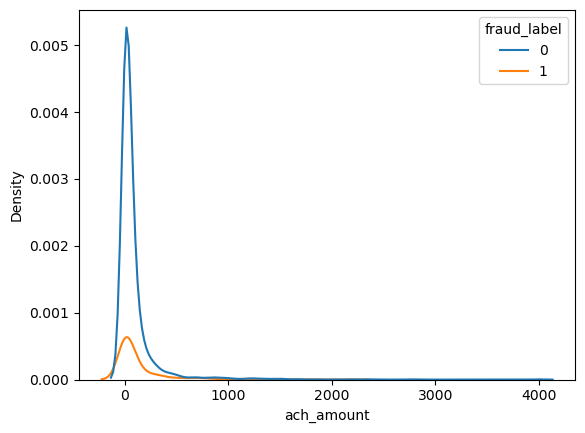

In [30]:
fraud_df = df[df.fraud_label == 1]
nonfraud_df = df[df.fraud_label == 0].sample(len(fraud_df) * 5, random_state=42)
viz_df = pd.concat([fraud_df, nonfraud_df])

sns.kdeplot(data=viz_df, x="ach_amount", hue="fraud_label")


<Axes: xlabel='x', ylabel='y'>

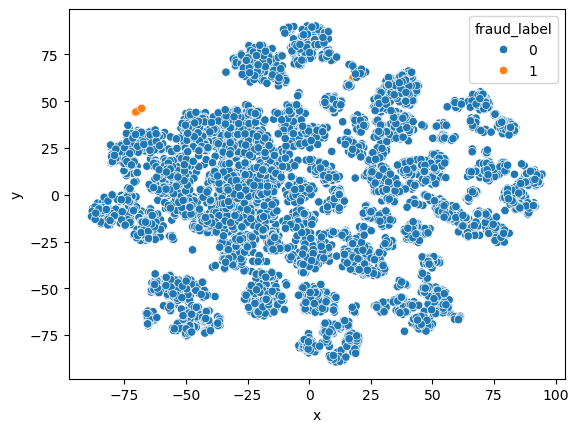

In [36]:
from sklearn.manifold import TSNE

#t-sne to view fraud
sample = df.sample(10000)
X = sample[[f'embedding_feature_{i}' for i in range(1,29)]]

emb_2d = TSNE(n_components=2).fit_transform(X)

sample['x'] = emb_2d[:,0]
sample['y'] = emb_2d[:,1]

sns.scatterplot(data=sample, x='x', y='y', hue='fraud_label')



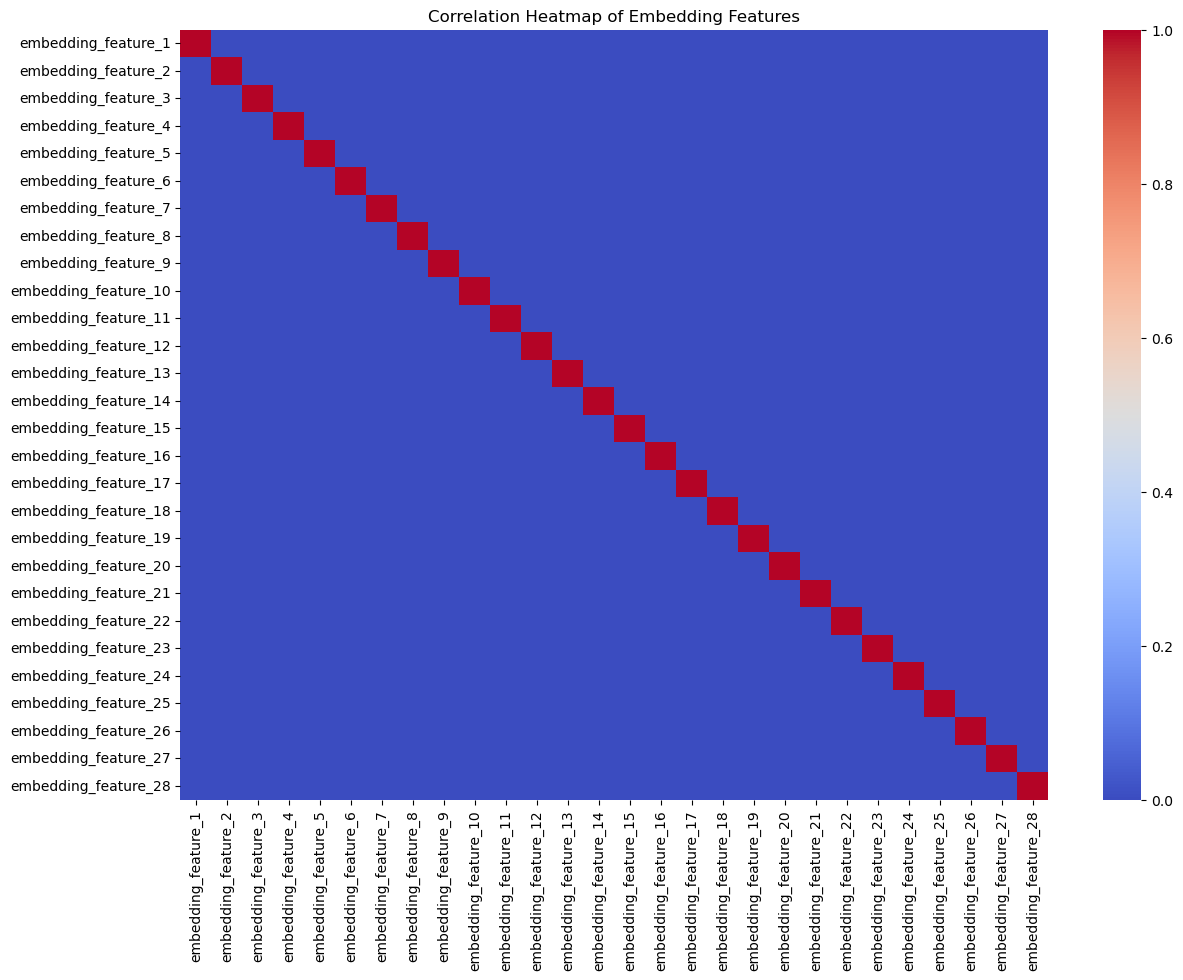

In [ ]:
# correlation heatmap b/w the embedding features
embeddings = df[[col for col in df.columns if "embedding_feature" in col]]

plt.figure(figsize=(14,10))
sns.heatmap(embeddings.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap of Embedding Features")
plt.show()


In [ ]:
# Comparison b/w fraud and non-fraud
df.groupby("fraud_label")["ach_amount"].describe()


,count,mean,std,min,25%,50%,75%,max
fraud_label,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


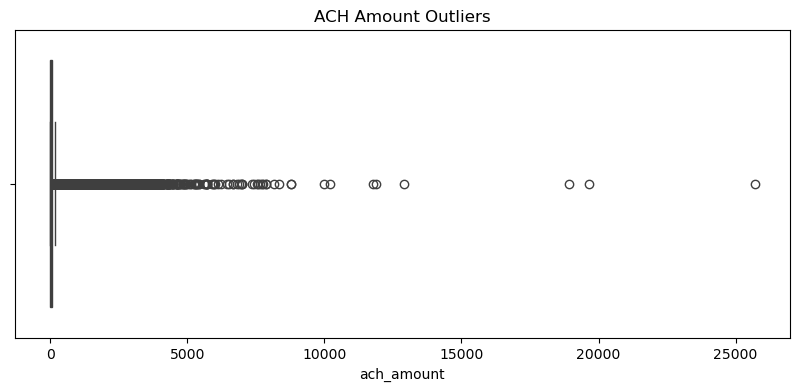

In [ ]:
# Outlier analysis in ach amount
plt.figure(figsize=(10,4))
sns.boxplot(x=df['ach_amount'])
plt.title("ACH Amount Outliers")
plt.show()


In [ ]:
# Feature corralations with fraud
numeric_cols = ['ach_amount'] + [f'embedding_feature_{i}' for i in range(1,29)]
corr_with_fraud = df[numeric_cols + ['fraud_label']].corr()['fraud_label'].sort_values()

corr_with_fraud.tail(10)


embedding_feature_28    0.009536
embedding_feature_27    0.017580
embedding_feature_8     0.019875
embedding_feature_20    0.020090
embedding_feature_19    0.034783
embedding_feature_21    0.040413
embedding_feature_2     0.091289
embedding_feature_4     0.133447
embedding_feature_11    0.154876
fraud_label             1.000000
Name: fraud_label, dtype: float64